In [1]:
# description
# https://www.kaggle.com/c/boston-housing

# TensorFlow and tf.keras

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [7]:
import pandas as pd 
X_train = pd.read_csv('out_X.csv', delimiter = ',')
Y_train = pd.read_csv('bi_out_Y.csv', delimiter = ',')

X_train = StandardScaler().fit_transform(X_train)
Y_train = pd.factorize(Y_train.x)[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
def create_model():
    model = Sequential()
    model.add(Dense(40, input_shape=[48], activation = 'relu'))
    model.add(Dense(30, activation = 'relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


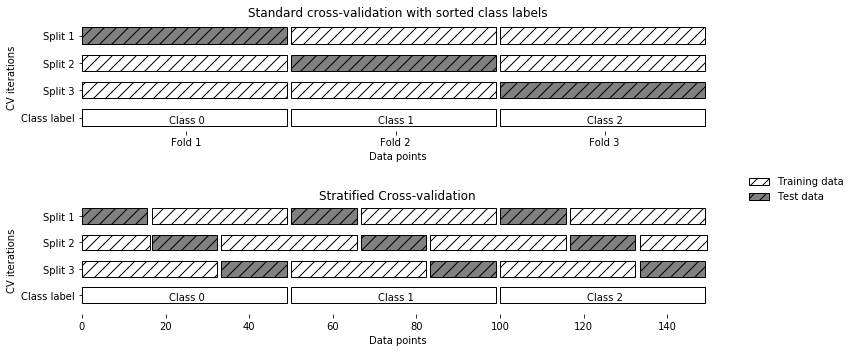

In [9]:
#stratified k-fold cross-validation
# library import
import matplotlib.pyplot as plt
import matplotlib
import mglearn
# matplotlob 설정

matplotlib.rc('font', family='AppleGothic') # 한글출력
plt.rcParams['axes.unicode_minus']=False # 축 -

mglearn.plots.plot_stratified_cross_validation()
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
#skf = StratifiedKFold(n_splits=2)
#skf.get_n_splits(X_train, Y_train)
#print(skf)
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=3,  verbose=0)
#출처: https://3months.tistory.com/321 [Deep Play]
    
'''for train_index, test_index in skf.split(X_train, Y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X_train[train_index], X_train[test_index]
    y_train, y_test = Y_train[train_index], Y_train[test_index]'''

'for train_index, test_index in skf.split(X_train, Y_train):\n    print("TRAIN:", train_index, "TEST:", test_index)\n    x_train, x_test = X_train[train_index], X_train[test_index]\n    y_train, y_test = Y_train[train_index], Y_train[test_index]'

In [12]:
for n in [10]:
    skf = StratifiedKFold(n_splits=n, random_state=0, shuffle=True)
    scores = cross_val_score(model, X_train, Y_train, cv=skf, scoring="accuracy")
    print('n_splits={}, cross validation score: {}'.format(n, scores))

n_splits=10, cross validation score: [1.         1.         1.         1.         1.         1.
 0.99998479 1.         0.99998479 1.        ]


In [ ]:
for n in [3, 5]:
    kfold = KFold(n_splits=n, shuffle=True, random_state=0)
    scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
